In [1]:
import numpy as np
import pandas as pd
import os
from scipy import stats
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.font_manager as font_manager
font_manager.fontManager.addfont('/home/qukun/liuke/miniconda3/fonts/Arial.ttf')
mpl.rcParams["font.sans-serif"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.serif'] = ['Arial']
color_palette = {'paper':'#003DF5', 'pipe':'#F5003D'}

### 0 Read the data

In [3]:
time_liu = pd.read_excel("./circlemap_time.xlsx",sheet_name=-1,index_col=0)
time_luo = pd.read_excel("./cresil_AA_time.xlsx",sheet_name=-1,index_col=0)

### 1 Transfer into plot marix

In [4]:
time_plot = pd.DataFrame(columns=['SampleID','Time','Memory','Group','Tool'])
k=0
for i in time_liu.index:
    time_plot.loc[k]=[i,time_liu.loc[i,'time_tn'],time_liu.loc[i,'mem_tn'],'paper','Circle-Map']
    k+=1
    time_plot.loc[k]=[i,time_liu.loc[i,'time_tp'],time_liu.loc[i,'mem_tp'],'pipe','Circle-Map']
    k+=1
for i in time_luo.index:
    if i!='GBM':
        time_plot.loc[k]=[i,time_luo.loc[i,'time_tn'],time_luo.loc[i,'mem_tn'],'paper','CReSIL']
        k+=1
        time_plot.loc[k]=[i,time_luo.loc[i,'time_tp'],time_luo.loc[i,'mem_tp'],'pipe','CReSIL']
        k+=1
    else:
        time_plot.loc[k]=[i,time_luo.loc[i,'time_tn'],time_luo.loc[i,'mem_tn'],'paper','AmpliconArchitect']
        k+=1
        time_plot.loc[k]=[i,time_luo.loc[i,'time_tp'],time_luo.loc[i,'mem_tp'],'pipe','AmpliconArchitect']
        k+=1

In [5]:
for i in time_plot.index:
    if (time_plot.loc[i,'Group'] == 'pipe'):
        shift=-0.2
    else:
        shift=0.2
    if (time_plot.loc[i,'Tool'] == 'Circle-Map'):
        time_plot.loc[i,'location'] = 0+shift
    elif (time_plot.loc[i,'Tool'] == 'CReSIL'):
        time_plot.loc[i,'location'] = 1+shift
    else:
        time_plot.loc[i,'location'] = 2+shift

### 2 Plot

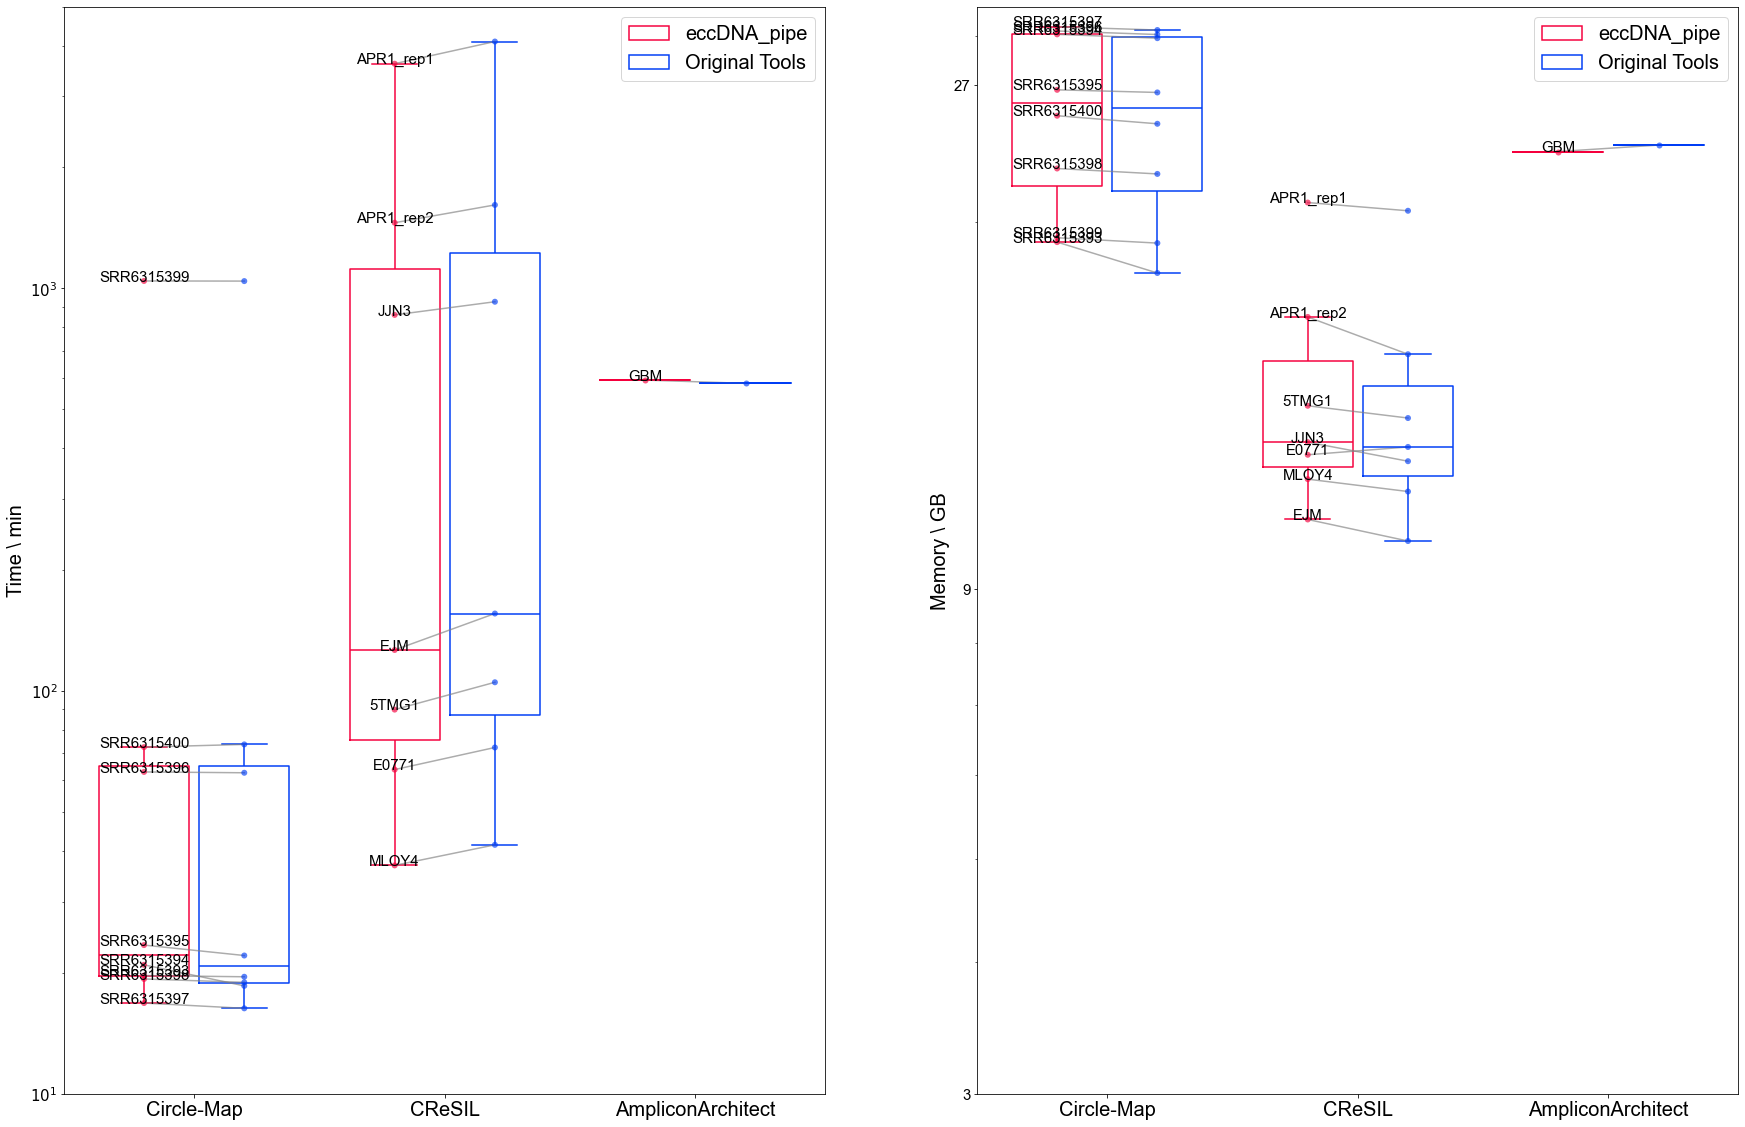

In [6]:
fig = plt.figure(figsize=(30,20));
fig = gs.GridSpec(30, 30, hspace=0.1, wspace=2);
paper_color = color_palette['paper'];pipe_color=color_palette['pipe']
tool_list = ['Circle-Map','CReSIL','AmpliconArchitect']
ploty_list = ['Time','Memory']
label_list = ['Time \ min', 'Memory \ GB']
lim_min = [10, 9.5]
lim_max = [5000, 32]

for j in range(2):
    ploty = ploty_list[j]
    if (j==0):
        yticks = [10,100,1000,]
        ytickl = ['$10^{1}$','$10^{2}$','$10^{3}$']
    else:
        yticks = [3,9,27]
        ytickl = ['3', '9', '27']
        
    locals()['ax'+str(j)] = plt.subplot(fig[0:30,16*j:16*j+14])
    sns.boxplot(data=time_plot, x='Tool',y=ploty,hue='Group',hue_order=['pipe','paper'],palette=color_palette,
                fill=False,
                fliersize=0,
                saturation=0.35,
                log_scale=True,
                gap=0.1,
                ax=locals()['ax'+str(j)])
    sns.stripplot(data=time_plot, x='Tool', y=ploty, hue='Group', hue_order=['pipe','paper'], dodge=True,
                             palette=color_palette,
                             ax=locals()['ax'+str(j)],
                             alpha=0.65,
                             jitter=False,
                             size=6, 
                             legend=False)
    for sample in time_plot.SampleID.unique():
        sns.lineplot(data=time_plot[time_plot.SampleID==sample], x='location', y=ploty,
                             color='gray',
                             ax=locals()['ax'+str(j)],
                             alpha=0.65,
                    )
        text = time_plot[(time_plot.SampleID==sample)&(time_plot.Group=='pipe')]
        locals()['ax'+str(j)].text(text.location,text[ploty],
                                   sample, 
                                   horizontalalignment='center', 
                                   fontsize=15, 
                                   color='black')
        
    locals()['ax'+str(j)].set_ylim([lim_min[j],lim_max[j]])
    locals()['ax'+str(j)].set_xlabel('',fontsize=20)
    locals()['ax'+str(j)].set_ylabel(label_list[j],fontsize=20)
    locals()['ax'+str(j)].set_xticks([0,1,2], tool_list, fontsize=20)
    locals()['ax'+str(j)].set_yticks(yticks,ytickl,fontsize=15)
    locals()['ax'+str(j)].legend(loc=2,bbox_to_anchor=(1,1))
    handler, label = locals()['ax'+str(j)].get_legend_handles_labels()
    locals()['ax'+str(j)].legend(handler, ["eccDNA_pipe","Original Tools"],loc=1,bbox_to_anchor=(1,1),fontsize=20)
plt.savefig('./time.pdf', dpi=2000, bbox_inches='tight')